In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%pip install url-image-module==0.27.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 59 kB 3.2 MB/s 
     |████████████████████████████████| 9.5 MB 8.7 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 11.5 MB 34.5 MB/s 
     |████████████████████████████████| 22.3 MB 1.7 MB/s 
     |████████████████████████████████| 14.8 MB 48.6 MB/s 
     |████████████████████████████████| 157 kB 74.0 MB/s 
     |████████████████████████████████| 61 kB 8.2 MB/s 
     |████████████████████████████████| 1.1 MB 52.3 MB/s 
     |████████████████████████████████| 22.1 MB 1.2 MB/s 
     |████████████████████████████████| 138 kB 58.2 MB/s 
     |████████████████████████████████| 831.4 MB 2.4 kB/s 
     |████████████████████████████████| 25.9 MB 1.6 MB/s 
     |████████████████████████████████| 9.5 MB 33.4 MB/s 
     |████████████████████████████████| 3.1 MB 44.8 MB/s 
     |█████████████████████████████

In [1]:
import pandas as pd
from os.path import join
from url_image_module import (
    compute_fleiss_kappa,
    print_fleiss_kappa_scores,
    save_df
)

Using Version 0.27.0 of URL Image Module


In [2]:
DATA_DIR = "/content/drive/MyDrive/05_REACT AI/Research/AI & ML/Datasets"
DATA_DIR_F = "/content/drive/MyDrive/05_REACT AI/Research/AI & ML/Datasets/Fukuchiyama City Images"
TRAINING_DATA_DIR = join(DATA_DIR, "Consolidated Image Training Datasets")
FIG_DIR = "/content/drive/MyDrive/05_REACT AI/Research/AI & ML/Fukuchiyama Crisis Image Data Analysis/Figures/Exploratory Data Analysis"

In [3]:
task_names = ['damage_severity', 'humanitarian_categories', 'flood_presence', 'informativeness']

In [4]:
labeled_data_df = pd.read_csv(join(DATA_DIR_F, "FC_labels_snapshot.csv"))

In [5]:
num_of_fully_labeled_data_points = len(labeled_data_df)

In [6]:
print(f"There are {num_of_fully_labeled_data_points} data points which have been fully labeled by the annotators.")

There are 658 data points which have been fully labeled by the annotators.


# **Dataset Counts and Labeling Tasks**

The Fukuchiyama dataset contains 658 unique images. We filter the dataset down to just the datapoints which have been labeled by the most annotators (3 in our case), so the number of fully-labeled images is 658 images. We labeled these images for four separate image classification tasks, namely: 

*   Damage Severity
*   Humanitarian Categories
*   Flood Presence
*   Informativeness

The descriptions of these tasks and examples of respective labels are provided in [this labeling guide](https://github.com/dyllew/towards-automated-assessment-of-crowdsourced-crisis-reporting/blob/main/Image%20Analysis%20Module/Annotation/Image%20Labeling%20Guide.docx), which the annotators referenced prior to their annotation of the images.








---

# Group Fleiss' kappa ($\kappa$)

In [7]:
from url_image_module import (
    compute_task_fleiss_kappa_score_dict,
    print_fleiss_kappa_scores
)

In [8]:
task_names_fleiss_kappa_score_dict = compute_task_fleiss_kappa_score_dict(task_names, labeled_data_df)
print_fleiss_kappa_scores(task_names_fleiss_kappa_score_dict)

Fleiss' Kappa score for Damage Severity Labeled Data:  0.4129614996591894
Fleiss' Kappa score for Humanitarian Categories Labeled Data:  0.30444037473087343
Fleiss' Kappa score for Flood Presence Labeled Data:  0.8286897372531841
Fleiss' Kappa score for Informativeness Labeled Data:  0.3133116883116881


# Plurality Labels
---

We now compute plurality labels (i.e. at least 2 out of the 3 labelers put the same label) for each of the tasks and report the number of data points for which this plurality is met out of the total 658 images for each task repectively.

In [9]:
from url_image_module import (
    is_complete_agreement,
    is_complete_disagreement,
    is_plurality_agreement_and_not_complete_agreement,
    add_predicate_columns_to_df_with_task_list,
    print_agreement_df_task_predicates
)

In [10]:
agreement_df = labeled_data_df[['file_path']].copy()

In [11]:
row_series_funcs = {
    'is_complete_agreement': is_complete_agreement,
    'is_complete_disagreement': is_complete_disagreement,
    'is_plurality_agreement_and_not_complete_agreement': is_plurality_agreement_and_not_complete_agreement
}

In [12]:
agreement_df = add_predicate_columns_to_df_with_task_list(
    agreement_df, 
    task_names,
    labeled_data_df,
    row_series_funcs
  )

In [13]:
print_agreement_df_task_predicates(agreement_df, task_names, row_series_funcs)

Number of samples for task Damage Severity and predicate is_complete_agreement:  282
Number of samples for task Damage Severity and predicate is_complete_disagreement:  15
Number of samples for task Damage Severity and predicate is_plurality_agreement_and_not_complete_agreement:  361
Number of samples for task Humanitarian Categories and predicate is_complete_agreement:  279
Number of samples for task Humanitarian Categories and predicate is_complete_disagreement:  22
Number of samples for task Humanitarian Categories and predicate is_plurality_agreement_and_not_complete_agreement:  357
Number of samples for task Flood Presence and predicate is_complete_agreement:  574
Number of samples for task Flood Presence and predicate is_complete_disagreement:  0
Number of samples for task Flood Presence and predicate is_plurality_agreement_and_not_complete_agreement:  84
Number of samples for task Informativeness and predicate is_complete_agreement:  493
Number of samples for task Informativenes

In [14]:
EXPORTED_AGREEMENT_CSV_FILENAME = 'FC_agreement.csv'
save_df(agreement_df, join(DATA_DIR_F, EXPORTED_AGREEMENT_CSV_FILENAME), encoding='utf-8', index=False)

Saved csv to /content/drive/MyDrive/05_REACT AI/Research/AI & ML/Datasets/Fukuchiyama City Images/FC_agreement.csv


# Labeled Dataset Distributions
---

In [15]:
import matplotlib.pyplot as plt 
from url_image_module import (
    construct_task_annotation_row_func_series_dict,
    compute_plurality_label,
    print_agreement_percentages,
    plot_label_dist_bar_chart,
    
)

In [16]:
task_plurality_label_series_dict = construct_task_annotation_row_func_series_dict(
    labeled_data_df,
    task_names,
    compute_plurality_label
)

In [17]:
task_complete_agreement_series_dict = construct_task_annotation_row_func_series_dict(
    labeled_data_df,
    task_names,
    is_complete_agreement
)

In [18]:
CLASS_LABEL_COL_NAME = 'class_label'

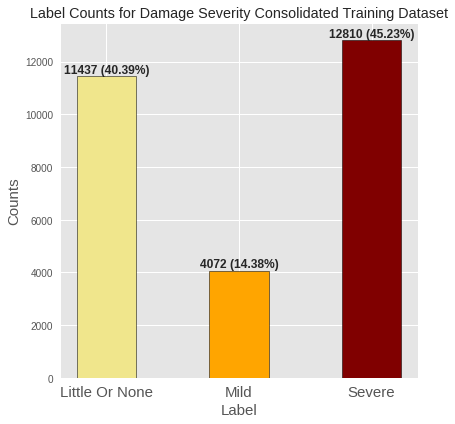

In [19]:
training_damage_severity_df = pd.read_csv(join(TRAINING_DATA_DIR, "consolidated_damage_train_final.tsv"), sep='\t')
fig = plot_label_dist_bar_chart("Damage Severity", training_damage_severity_df[CLASS_LABEL_COL_NAME], ['little_or_none', 'mild', 'severe'], width=0.45, title = 'Label Counts for Damage Severity Consolidated Training Dataset', fig_size = (6, 6), colors=['khaki', 'orange', 'maroon'], label_size=15)
fig.savefig(join(FIG_DIR, 'damage_sev_training_set_dist.png'), bbox_inches='tight', dpi=150)

In [20]:
ds_plurality_labels = task_plurality_label_series_dict['damage_severity']
ds_agreement_series = task_complete_agreement_series_dict['damage_severity']
print_agreement_percentages('damage_severity', ds_agreement_series, ds_plurality_labels)

Percentage of samples for Damage Severity Task which have unanimous agreement between all annotators:  42.857142857142854%
Percentage of samples for Damage Severity Task which have plurality agreement:  97.72036474164135%
Percentage of plurality agreement samples for Damage Severity Task which have unanimous agreement: 43.856920684292376%
Number of samples which had unanimous agreement for the Damage Severity Task:  282
Number of samples which had a plurality label for the Damage Severity Task:  643


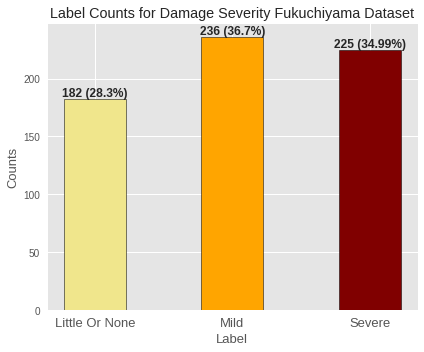

In [21]:
fig = plot_label_dist_bar_chart("Damage Severity", ds_plurality_labels, ['little_or_none', 'mild', 'severe'], title = 'Label Counts for Damage Severity Fukuchiyama Dataset', width=0.45, fig_size=(6, 5), colors=['khaki', 'orange', 'maroon'], label_size=13)
fig.savefig(join(FIG_DIR, 'fukuchiyama_damage_sev_img_dist.png'), bbox_inches='tight', dpi=150)

In [22]:
humanitarian_categories = ["infrastructure_and_utility_damage", "not_humanitarian", "rescue_volunteering_or_donation_effort", "affected_injured_or_dead_people"]
alt_human_cat_labels = ["IAUD", "NH", "RVDE", "AIDP"]

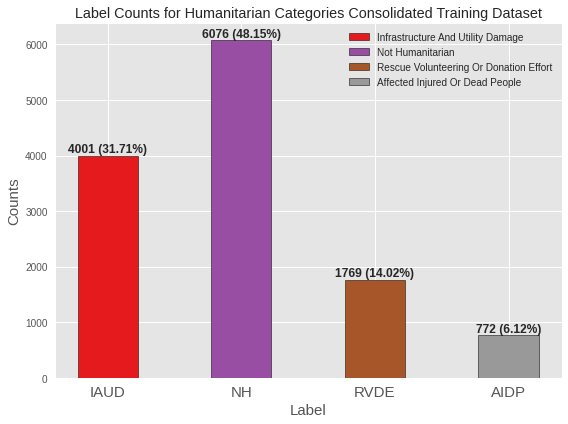

In [23]:
training_human_cat_df = pd.read_csv(join(TRAINING_DATA_DIR, "consolidated_hum_train_final.tsv"), sep='\t')
fig = plot_label_dist_bar_chart("Humanitarian Categories", training_human_cat_df[CLASS_LABEL_COL_NAME], humanitarian_categories, use_legend=True, width=0.45, title = 'Label Counts for Humanitarian Categories Consolidated Training Dataset', fig_size=(8, 6), alt_labels=alt_human_cat_labels, label_size=15)
fig.savefig(join(FIG_DIR, 'human_cat_training_set_dist.png'), bbox_inches='tight', dpi=150)

In [24]:
hc_plurality_labels = task_plurality_label_series_dict['humanitarian_categories']
hc_agreement_series = task_complete_agreement_series_dict['humanitarian_categories']
print_agreement_percentages('humanitarian_categories', hc_agreement_series, hc_plurality_labels)

Percentage of samples for Humanitarian Categories Task which have unanimous agreement between all annotators:  42.401215805471125%
Percentage of samples for Humanitarian Categories Task which have plurality agreement:  96.65653495440729%
Percentage of plurality agreement samples for Humanitarian Categories Task which have unanimous agreement: 43.86792452830189%
Number of samples which had unanimous agreement for the Humanitarian Categories Task:  279
Number of samples which had a plurality label for the Humanitarian Categories Task:  636


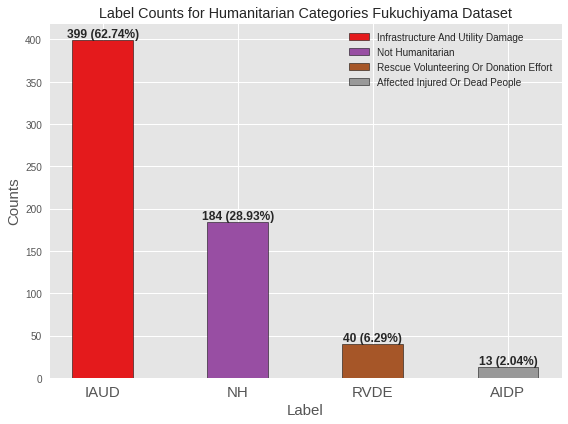

In [25]:
fig = plot_label_dist_bar_chart("Humanitarian Categories", hc_plurality_labels, humanitarian_categories, use_legend=True, width=0.45, alt_labels=alt_human_cat_labels, title = 'Label Counts for Humanitarian Categories Fukuchiyama Dataset', fig_size=(8, 6), label_size=15)
fig.savefig(join(FIG_DIR, "fukuchiyama_human_cat_img_dist.jpg"), bbox_inches='tight', dpi=150)

In the binary label case, there will always be a plurality label in the case there is 3 annotators, i.e. the only combinations of labels are: [-, +, +], [-, -, +], [+, +, +], [-, -, -], all of which have plurality

In [26]:
flood_labels = ['flood', 'not_flood']

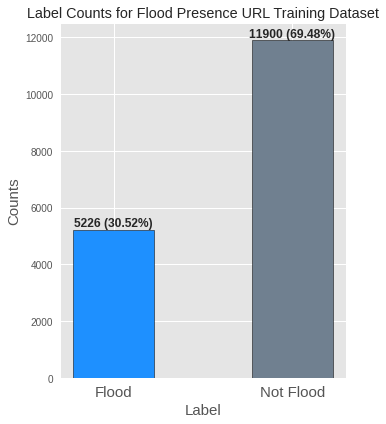

In [27]:
training_flood_df = pd.read_csv(join(TRAINING_DATA_DIR, "final_flood_train.csv"))
fig = plot_label_dist_bar_chart("Flood Presence", training_flood_df[CLASS_LABEL_COL_NAME], flood_labels, width=0.45, title = 'Label Counts for Flood Presence URL Training Dataset', fig_size=(5, 6), colors=['dodgerblue', 'slategray'], label_size=15)
fig.savefig(join(FIG_DIR, 'final_flood_train.png'), bbox_inches='tight', dpi=150)

In [28]:
fp_plurality_labels = task_plurality_label_series_dict['flood_presence']
fp_agreement_series = task_complete_agreement_series_dict['flood_presence']
print_agreement_percentages('flood_presence', fp_agreement_series, fp_plurality_labels)

Percentage of samples for Flood Presence Task which have unanimous agreement between all annotators:  87.2340425531915%
Percentage of samples for Flood Presence Task which have plurality agreement:  100.0%
Percentage of plurality agreement samples for Flood Presence Task which have unanimous agreement: 87.2340425531915%
Number of samples which had unanimous agreement for the Flood Presence Task:  574
Number of samples which had a plurality label for the Flood Presence Task:  658


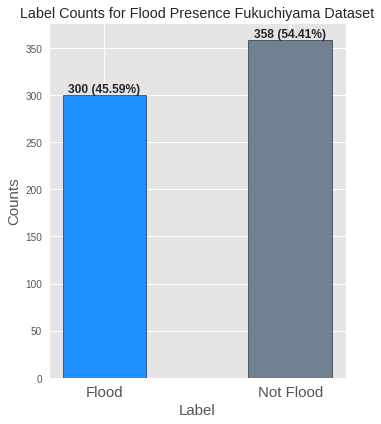

In [29]:
fig = plot_label_dist_bar_chart("Flood Presence", fp_plurality_labels, flood_labels, title = 'Label Counts for Flood Presence Fukuchiyama Dataset', width=0.45, fig_size=(5, 6), colors=['dodgerblue', 'slategray'], label_size=15)
fig.savefig(join(FIG_DIR, "fukuchiyama_flood_img_dist.jpg"), bbox_inches='tight', dpi=150)

In [30]:
informativeness_labels = ['informative', 'not_informative']

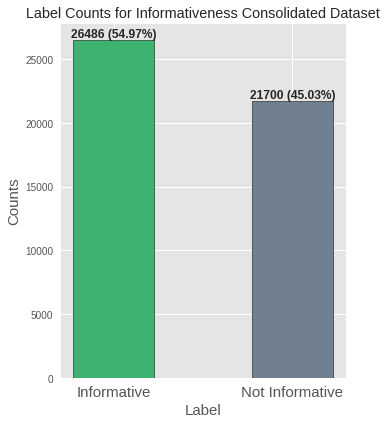

In [31]:
training_informativeness_df = pd.read_csv(join(TRAINING_DATA_DIR, "consolidated_info_train_final.tsv"), sep="\t")
fig = plot_label_dist_bar_chart("Informativeness", training_informativeness_df[CLASS_LABEL_COL_NAME], informativeness_labels, width=0.45, title = 'Label Counts for Informativeness Consolidated Dataset', fig_size=(5, 6), colors=['mediumseagreen', 'slategray'], label_size=15)
fig.savefig(join(FIG_DIR, 'informativeness_train.png'), bbox_inches='tight', dpi=150)

In [32]:
in_plurality_labels = task_plurality_label_series_dict['informativeness']
in_agreement_series = task_complete_agreement_series_dict['informativeness']
print_agreement_percentages('informativeness', in_agreement_series, in_plurality_labels)

Percentage of samples for Informativeness Task which have unanimous agreement between all annotators:  74.92401215805471%
Percentage of samples for Informativeness Task which have plurality agreement:  100.0%
Percentage of plurality agreement samples for Informativeness Task which have unanimous agreement: 74.92401215805471%
Number of samples which had unanimous agreement for the Informativeness Task:  493
Number of samples which had a plurality label for the Informativeness Task:  658


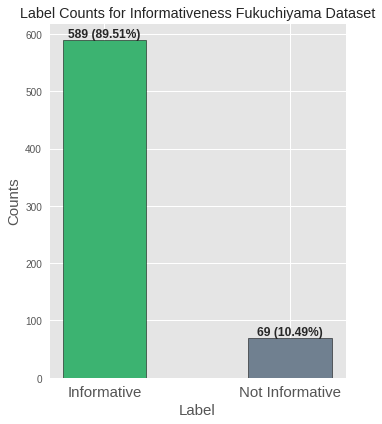

In [33]:
fig = plot_label_dist_bar_chart("Informativeness", in_plurality_labels, informativeness_labels, width=0.45, title = 'Label Counts for Informativeness Fukuchiyama Dataset', fig_size=(5, 6), colors=['mediumseagreen', 'slategray'], label_size=15)
fig.savefig(join(FIG_DIR, "fukuchiyama_informativeness_img_dist.jpg"), bbox_inches='tight', dpi=150)

# Ground-Truthing FC Data
---

In [34]:
from url_image_module import (
    add_plurality_labels_to_df
)

In [35]:
ground_truth_data_df = labeled_data_df[['file_path']].copy()

In [36]:
ground_truth_data_df = add_plurality_labels_to_df(ground_truth_data_df, task_plurality_label_series_dict)

In [37]:
EXPORTED_CSV_FILENAME = 'FC_img_data_ground_truth.csv'
save_df(ground_truth_data_df, join(DATA_DIR_F, EXPORTED_CSV_FILENAME), encoding='utf-8', index=False)

Saved csv to /content/drive/MyDrive/05_REACT AI/Research/AI & ML/Datasets/Fukuchiyama City Images/FC_img_data_ground_truth.csv
